Ethereum above $2,700 on February 21?

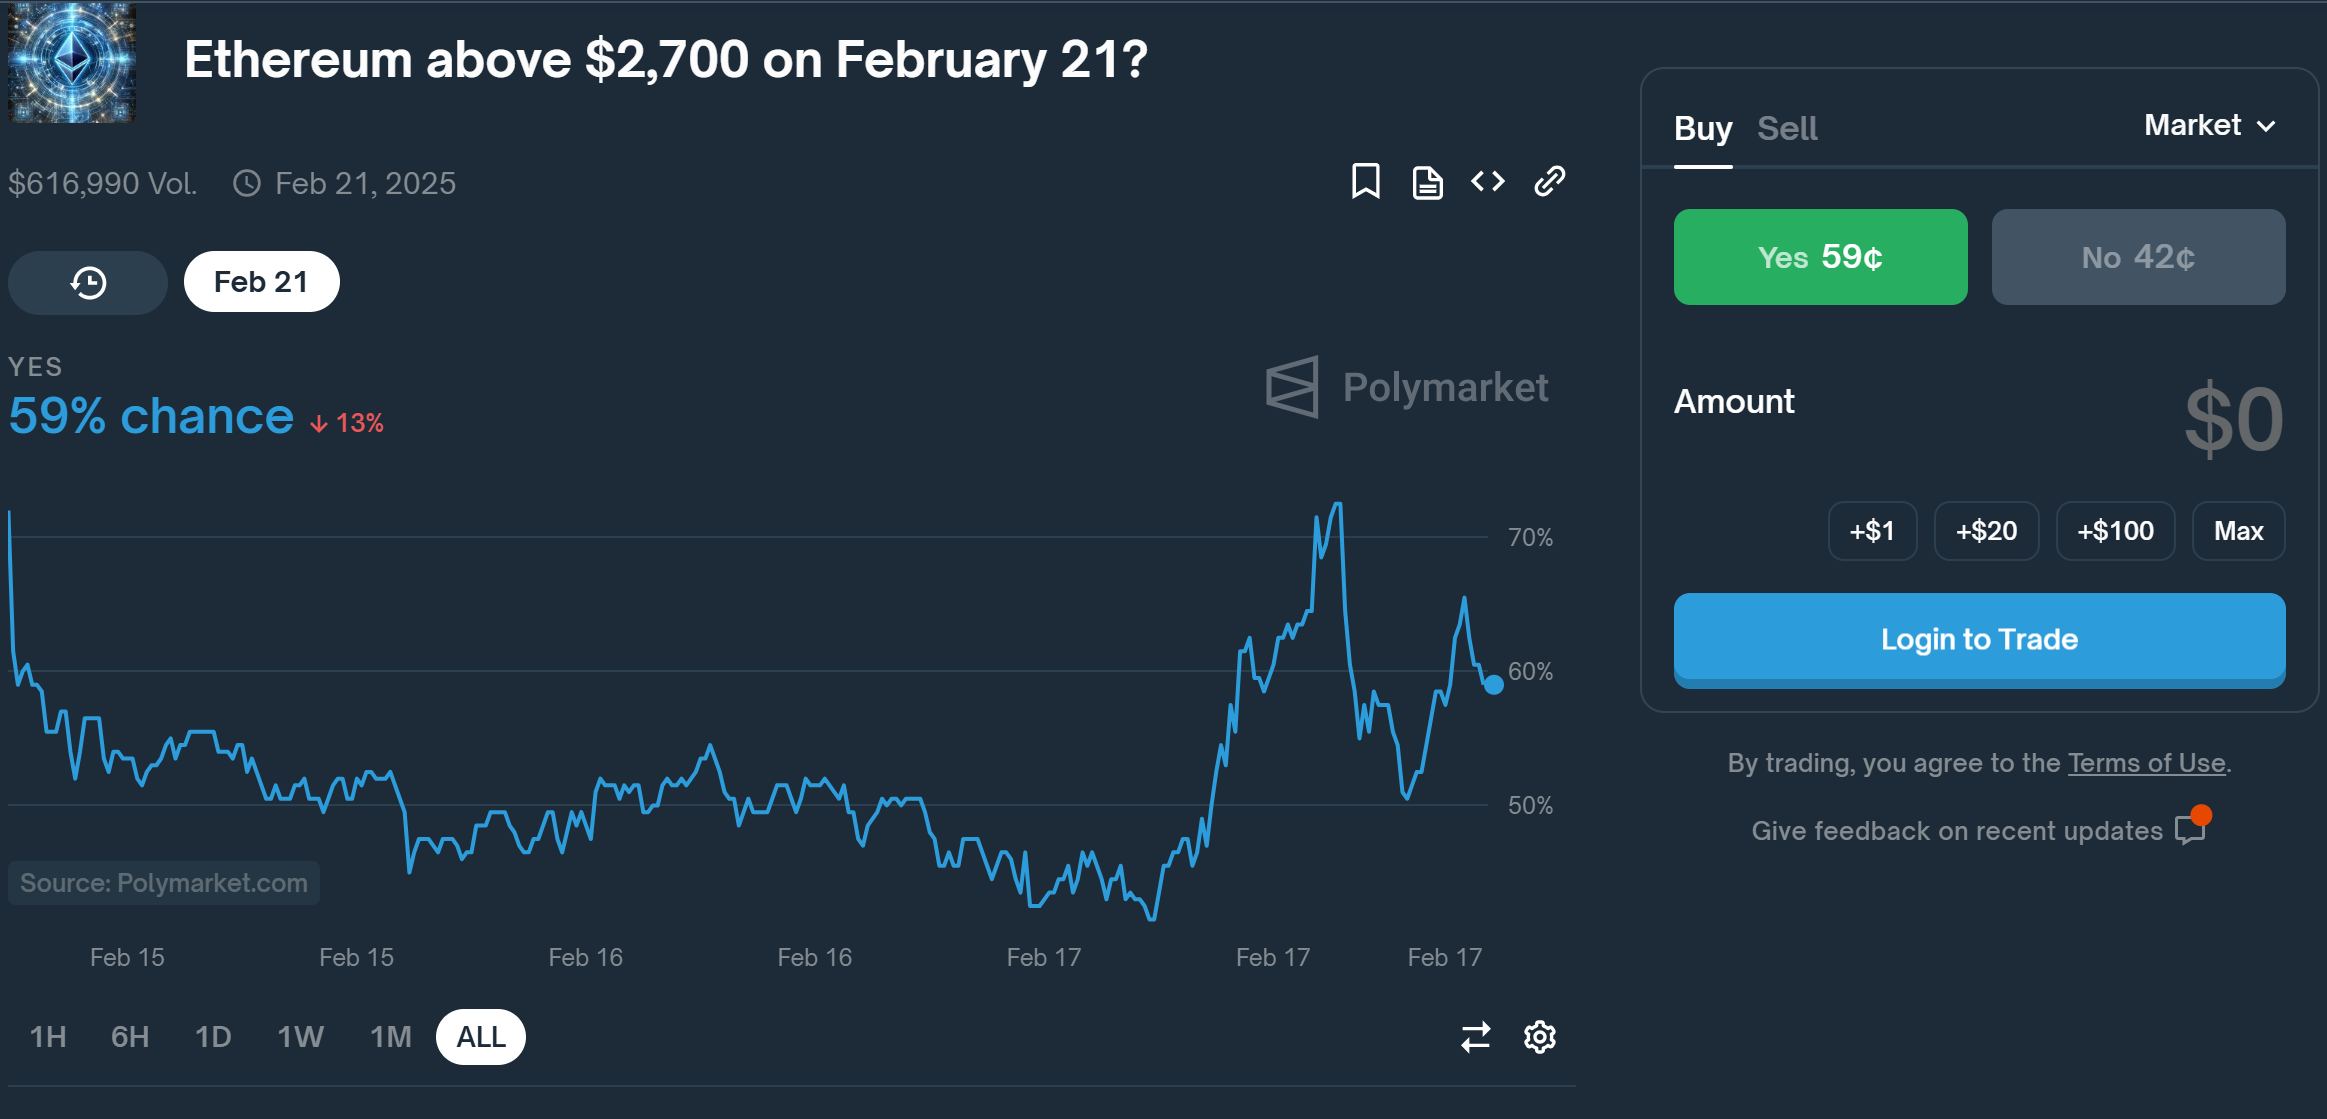

We are on 02/18/25, how can I predict provided that the current price of Ethereum is:

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
ticker = 'ETH-USD'
data = yf.download(ticker, period='2y')
data.tail(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2025-02-13 00:00:00+00:00,2675.902588,2675.902588,2756.443359,2615.667725,2737.028564,19481004625
2025-02-14 00:00:00+00:00,2726.091553,2726.091553,2790.023682,2666.268066,2675.939453,17732289901
2025-02-15 00:00:00+00:00,2693.559814,2693.559814,2738.681152,2668.531738,2726.074707,10803019357
2025-02-16 00:00:00+00:00,2663.315918,2663.315918,2724.096436,2655.297607,2693.562500,10593602117
2025-02-17 00:00:00+00:00,2742.419434,2742.419434,2836.372803,2650.839355,2662.227295,24218384384


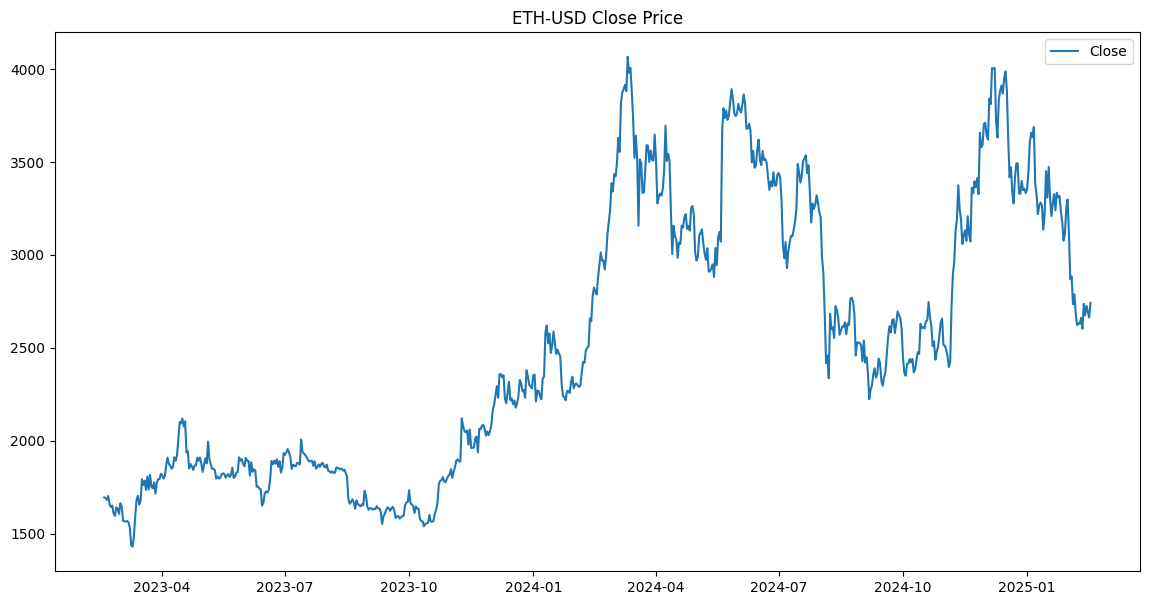

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close')
plt.title('ETH-USD Close Price')
plt.legend()
plt.show()

In [56]:
data.columns

MultiIndex([('Adj Close', 'ETH-USD'),
            (    'Close', 'ETH-USD'),
            (     'High', 'ETH-USD'),
            (      'Low', 'ETH-USD'),
            (     'Open', 'ETH-USD'),
            (   'Volume', 'ETH-USD')],
           names=['Price', 'Ticker'])

In [57]:
# daily percent change + standardize
data['returns'] = data['Close'].pct_change()
data['returns'] = data['returns'] - data['returns'].mean()
data = data.dropna()

data.tail(2)

Price,Adj Close,Close,High,Low,Open,Volume,returns
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,
Date,,,,,,,
2025-02-16 00:00:00+00:00,2663.315918,2663.315918,2724.096436,2655.297607,2693.562500,10593602117,-0.012329
2025-02-17 00:00:00+00:00,2742.419434,2742.419434,2836.372803,2650.839355,2662.227295,24218384384,0.028600


Exponential weighting

In [58]:
weights = [(0.5**(1/100))**i for i in range(len(data))][::-1]
weights /= np.sum(weights)  # Normalize weights

In [59]:
def monte_carlo_simulation(returns, weights, num_iterations, num_days):
    prices = []
    last_price = data['Close'].iloc[-1]
    for _ in range(num_iterations):
        daily_returns = np.random.choice(returns, size=num_days, p=weights)
        price_path = [last_price]
        for ret in daily_returns:
            price_path.append(price_path[-1] * (1 + ret))
        prices.append(price_path)
    return prices

In [60]:
prices = monte_carlo_simulation(data['returns'], weights, 100000, 3)

In [61]:
prices[0]

[Ticker
 ETH-USD    2742.419434
 Name: 2025-02-17 00:00:00+00:00, dtype: float64,
 Ticker
 ETH-USD    2651.267204
 Name: 2025-02-17 00:00:00+00:00, dtype: float64,
 Ticker
 ETH-USD    2436.103354
 Name: 2025-02-17 00:00:00+00:00, dtype: float64,
 Ticker
 ETH-USD    2389.851334
 Name: 2025-02-17 00:00:00+00:00, dtype: float64]

In [ ]:
prob_above_2700 = sum(p[-1] > 2700 for p in prices) / len(prices)

print(f"The probability that the price will be above $2,700 after 3 days is {prob_above_2700 * 100}%. with last 2 year eth sample and exp weight on draw")

The probability that the price will be above $2,700 after 3 days is Ticker
ETH-USD    57.628
Name: 2025-02-17 00:00:00+00:00, dtype: float64%. with last 2 year eth sample and exp weight on draw


It is coherent with the graph obtained previously where we observed polymarket priced at 59% of probability that ETH >= $2700.